### Student Activity: Portfolio Planner Part 2

This program is part 2 of a two-part student activity and continues the following:

`PART I: Portfolio Optimization via Risk Evaluation`

Reads in the CSV datasets of 10 stocks, calculates the volatility of each stock, drops the top-five highly volatile stocks, sets allocations for the remaining stocks based on risk/volatility, and calculates the returns of a hypothetical `$10,000` investment for the constructed portfolio.

`PART II: Portfolio Optimization via Correlation and Return-to-Risk (Sharpe Ratio) Evaluations`

Alternatively filters the same 10 stocks (from part 1) down to only minimally-correlated stocks with higher sharpe ratios, and calculates the returns of a hypothetical `$10,000` investment for the constructed optimized portfolio. Returns of the optimized portfolio are then compared to lesser-optimized portfolios.

---

### PART 1: Portfolio Optimization via Risk Evaluation

In [3]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns

%matplotlib inline

### Read CSVs as DataFrames 

In [4]:
# Set the file paths
bk_data = Path("../Resources/bk_data.csv")
fang_data = Path("../Resources/fang_data.csv")
jnj_data = Path("../Resources/jnj_data.csv")
luv_data = Path("../Resources/luv_data.csv")
mu_data = Path("../Resources/mu_data.csv")
nke_data = Path("../Resources/nke_data.csv")
sbux_data = Path("../Resources/sbux_data.csv")
t_data = Path("../Resources/t_data.csv")
wdc_data = Path("../Resources/wdc_data.csv")
wrk_data = Path("../Resources/wrk_data.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
bk_df = pd.read_csv(bk_data, index_col="date", infer_datetime_format=True, parse_dates=True)
fang_df = pd.read_csv(fang_data, index_col="date", infer_datetime_format=True, parse_dates=True)
jnj_df = pd.read_csv(jnj_data, index_col="date", infer_datetime_format=True, parse_dates=True)
luv_df = pd.read_csv(luv_data, index_col="date", infer_datetime_format=True, parse_dates=True)
mu_df = pd.read_csv(mu_data, index_col="date", infer_datetime_format=True, parse_dates=True)
nke_df = pd.read_csv(nke_data, index_col="date", infer_datetime_format=True, parse_dates=True)
sbux_df = pd.read_csv(sbux_data, index_col="date", infer_datetime_format=True, parse_dates=True)
t_df = pd.read_csv(t_data, index_col="date", infer_datetime_format=True, parse_dates=True)
wdc_df = pd.read_csv(wdc_data, index_col="date", infer_datetime_format=True, parse_dates=True)
wrk_df = pd.read_csv(wrk_data, index_col="date", infer_datetime_format=True, parse_dates=True)

# Display a few row.head()

### Combine DataFrames, Sort Index, and Rename Columns

In [5]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([bk_df, fang_df, jnj_df, luv_df, mu_df, nke_df, sbux_df, t_df, wdc_df, wrk_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Set column names
combined_df.columns = ['BK', 'FANG', 'JNJ', 'LUV', 'MU', 'NKE', 'SBUX', 'T', 'WDC', 'WRK']

# Display a few rows
combined_df.tail()

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2019-05-14,47.01,109.11,136.82,51.65,38.51,83.67,77.06,31.09,44.63,37.19
2019-05-15,46.51,109.06,136.91,52.01,38.41,84.01,77.76,31.25,45.49,37.44
2019-05-16,46.54,110.63,138.21,52.59,37.31,84.28,78.90,31.62,45.09,37.42
2019-05-17,46.08,111.02,138.61,52.24,36.06,84.57,78.91,31.80,44.63,36.66
2019-05-20,45.97,109.66,138.42,52.01,34.62,82.85,76.66,32.19,41.95,35.15


### Calculate Daily Returns

In [6]:
# Use the `pct_change` function to calculate daily returns
daily_returns = combined_df.pct_change()
daily_returns2 = combined_df.pct_change()
daily_returns.head()

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.020139,-0.002114,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290,-0.023352
2015-06-26,0.003034,-0.014923,0.005246,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452,0.000000
2015-06-29,-0.027687,-0.001196,-0.019671,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485,-0.017770
2015-06-30,0.004307,0.002927,-0.002252,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192,0.001645


### Evaluate Riskiness of Stocks

In [7]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = daily_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

JNJ     0.161128
T       0.187579
SBUX    0.206805
BK      0.224967
NKE     0.246045
LUV     0.280021
WRK     0.303601
FANG    0.370704
WDC     0.415605
MU      0.479955
dtype: float64

### Drop High Volatility Stocks

In [8]:
# Drop the 5 stocks with the highest volatility in daily returns
daily_returns.drop(columns=['MU', 'WDC', 'FANG', 'WRK', 'LUV'], inplace=True)
daily_returns.head()

,BK,JNJ,NKE,SBUX,T
date,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.002114,-0.009414,0.006703,0.011179
2015-06-26,0.003034,0.005246,0.042672,0.010172,-0.001658
2015-06-29,-0.027687,-0.019671,-0.018594,-0.019590,-0.009690
2015-06-30,0.004307,-0.002252,0.003251,0.001214,-0.006989


### Set Portfolio Allocations/Weights and Calculate Portfolio Daily Returns

In [11]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to sum the product each weight and the corresponding stock daily return
# BK, JNJ, NKE, SBUX, T
weights = [0.15, 0.05, 0.10, 0.2, 0.50]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.shape


(983,)

### Calculate Cumulative Returns

<AxesSubplot:xlabel='date'>

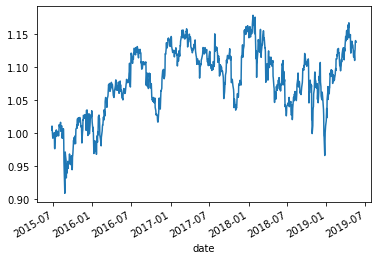

In [12]:
# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.plot()

### Plot Return of Portfolio Starting with Initial Investment of `$10,000`

<AxesSubplot:xlabel='date'>

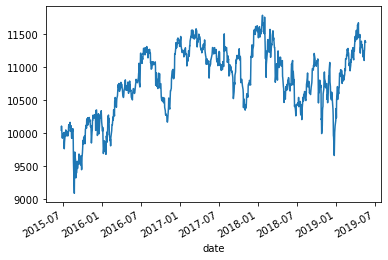

In [15]:
# Plot the returns of the portfolio in terms of money
initial_investment = 10000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot()

---

### PART 2: Portfolio Optimization via Correlation and Return-to-risk (sharpe ratio) Evaluations

### Reset Daily Returns DataFrame

In [28]:
# Re-calculate daily returns as the DataFrame was modified in part 1
daily_returns2

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.020139,-0.002114,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290,-0.023352
2015-06-26,0.003034,-0.014923,0.005246,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452,0.000000
2015-06-29,-0.027687,-0.001196,-0.019671,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485,-0.017770
2015-06-30,0.004307,0.002927,-0.002252,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192,0.001645
...,...,...,...,...,...,...,...,...,...,...
2019-05-14,-0.002969,0.017817,-0.002770,0.011951,0.030230,0.013813,0.004956,0.020348,0.038148,0.029623
2019-05-15,-0.010636,-0.000458,0.000658,0.006970,-0.002597,0.004064,0.009084,0.005146,0.019270,0.006722
2019-05-16,0.000645,0.014396,0.009495,0.011152,-0.028638,0.003214,0.014660,0.011840,-0.008793,-0.000534


### Evaluate Correlation of Stock Returns

<AxesSubplot:>

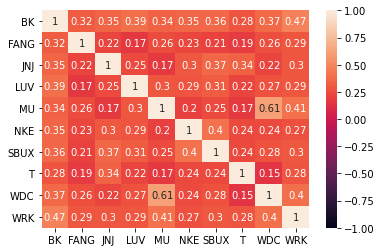

In [75]:
# Use the `corr` function to calculate the correlation between stock returns
stockcorr=daily_returns2.corr()
sns.heatmap(stockcorr
            , vmin=-1
            , vmax=1
            , annot=True
            , 
        )

<AxesSubplot:>

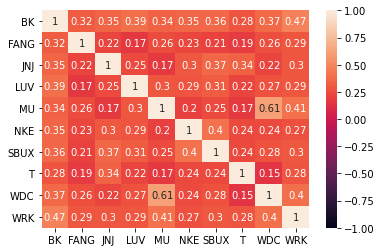

In [49]:
# Use the `heatmap` function from the Seaborn library to visualize the correlation table
sns.heatmap(stockcorr
            , vmin=-1
            , vmax=1
            , annot=True
            , 
        )

In [48]:
# Alternatively, sum total correlation for each stock
stockcorr.sum(axis=0).sort_values()



T       3.123182
FANG    3.145768
LUV     3.494862
NKE     3.512710
JNJ     3.518928
MU      3.700211
SBUX    3.722712
WDC     3.814908
WRK     4.017159
BK      4.242129
dtype: float64

### Drop the Two Most Consistently Correlated Stocks

In [64]:
# Drop highly correlated stocks and keep only the non-correlated stocks
noncorestocks= daily_returns2.drop(columns=['BK','WRK','WDC','T','FANG'])

### Evaluate Reward-to-Risk (Sharpe Ratio) of Minimally-Correlated Stocks

In [65]:
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharperatio = (noncorestocks.mean()*252)/ (noncorestocks.std()*np.sqrt(252))

sharperatio.sort_values(inplace=True)
sharperatio

MU      0.435027
LUV     0.520850
SBUX    0.545402
NKE     0.585923
JNJ     0.609743
dtype: float64

### Drop the Three Lowest Sharpe Ratio Stocks

In [17]:
# Drop the lowest sharpe ratio stocks and keep only the postive sharpe ratio stocks


,JNJ,LUV,MU,NKE,SBUX
date,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.002114,0.004076,-0.001663,-0.009414,0.006703
2015-06-26,0.005246,-0.004929,-0.181515,0.042672,0.010172
2015-06-29,-0.019671,-0.033217,-0.047304,-0.018594,-0.019590
2015-06-30,-0.002252,-0.002712,0.005873,0.003251,0.001214


### Evaluate Investment in Minimally-Correlated (Diversified) and Return-to-Risk (Sharpe Ratio) Optimized Portfolio

<AxesSubplot:xlabel='date'>

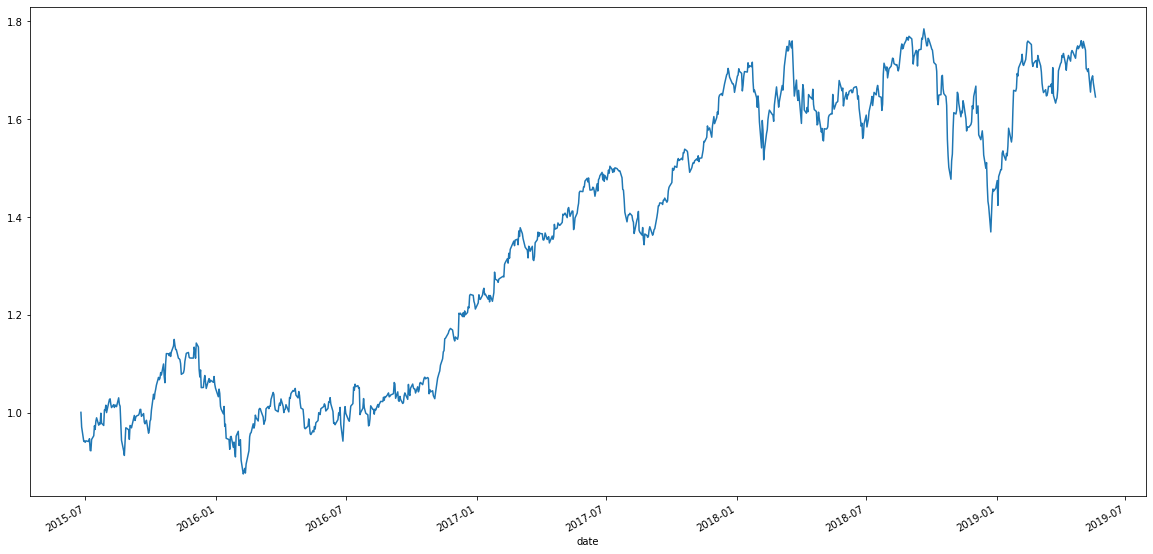

In [74]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Optimized Portfolio
money=5000
weights2=[0.1,0.4,0.2,0.15,0.15]
rtns2=noncorestocks.dot(weights2)
rtns2cum=(1+rtns2).cumprod()
portprofits=(money*rtns2cum)
rtns2cum.plot(figsize=(20,10))

### Evaluate Investment in Minimally-Correlated (Diversified) Portfolio

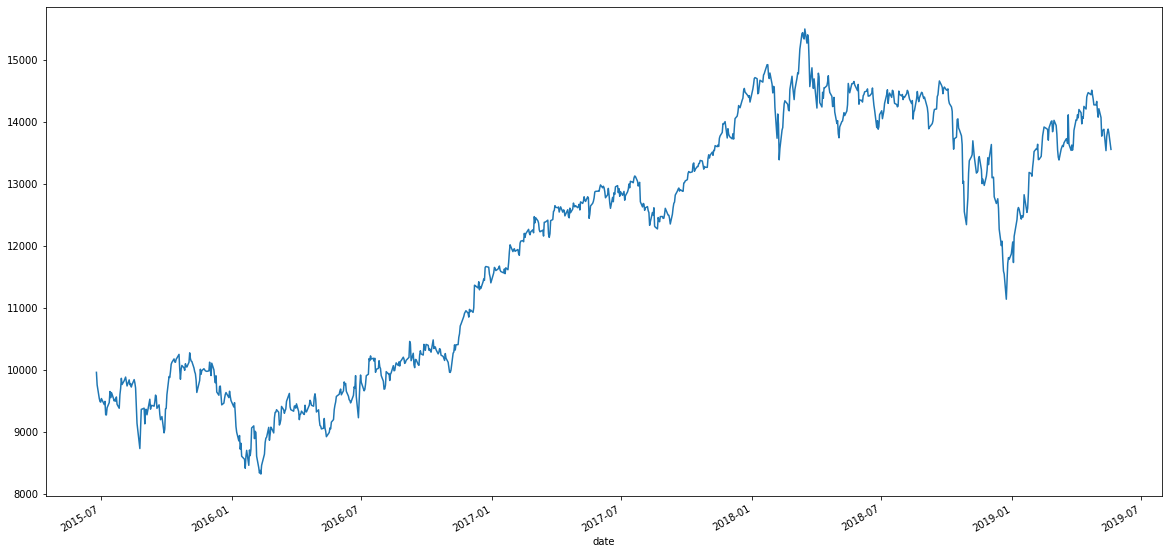

In [19]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Uncorrelated Portfolio


### Evaluate Investment in Original/Unoptimized Portfolio (No Modifications)

<AxesSubplot:xlabel='date'>

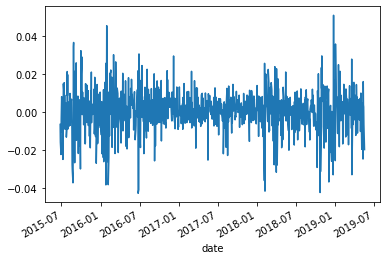

In [72]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Unoptimized Portfolio
initial_investment=10000
weights3=[.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,]
Unoptimizedpo=daily_returns2.dot(weights3)
Unoptimizedpo.plot()

### Overlay Hypothetical Portfolio Investments

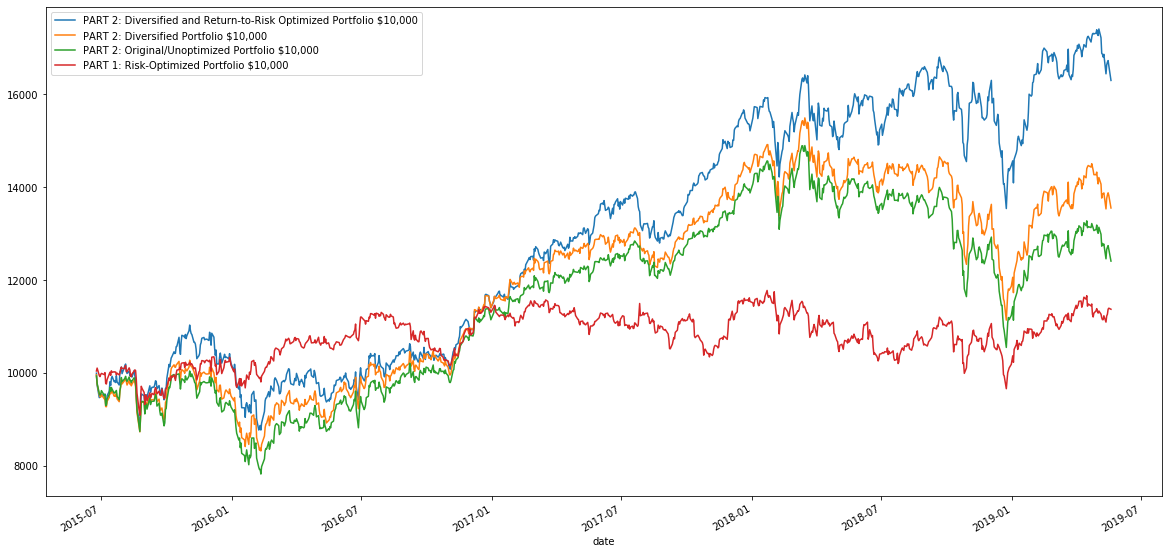

In [21]:
# Set the figure of the chart and plot each data trend on the single figure
